<a href="https://colab.research.google.com/github/RUSHILPATEL33/Python_cert/blob/main/IPL_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Deliveries shape: (260920, 17)
Matches shape: (1095, 20)
Merged deliveries shape: (260920, 23)


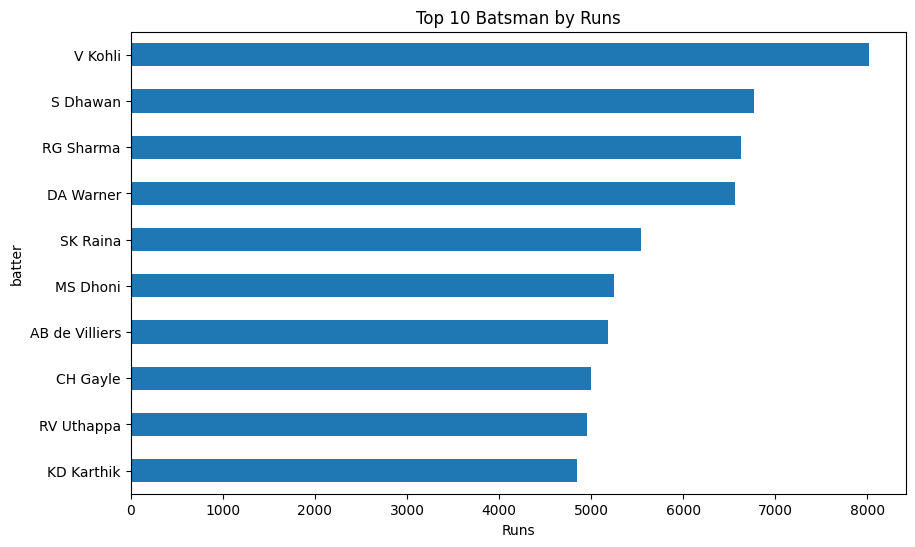

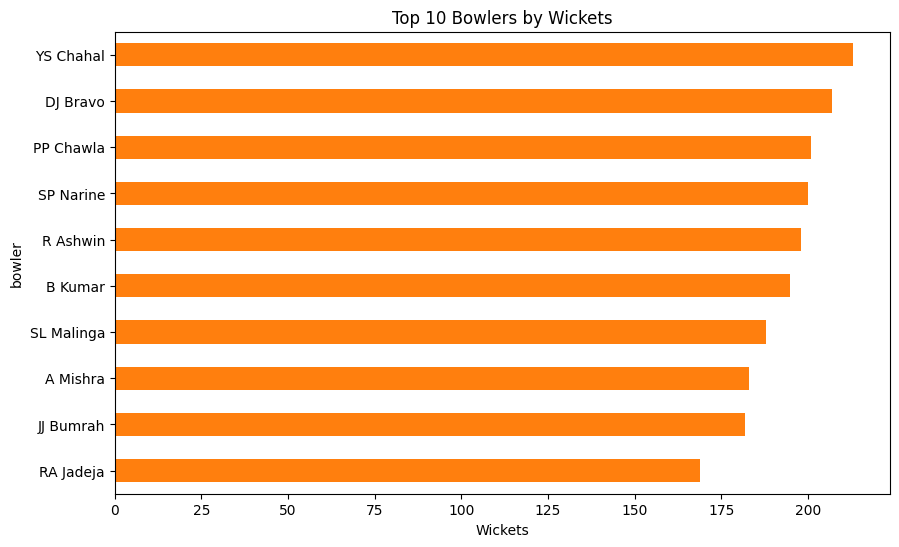

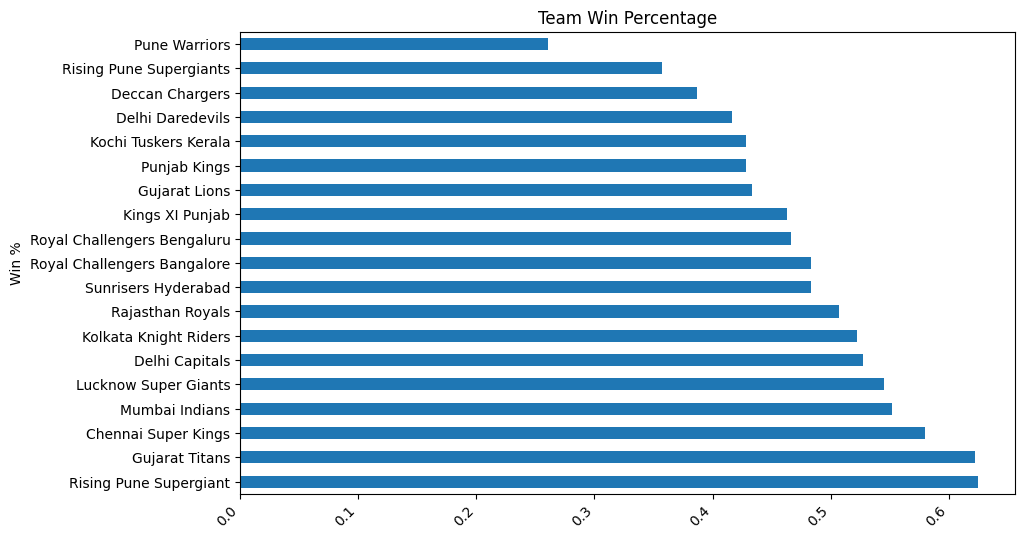

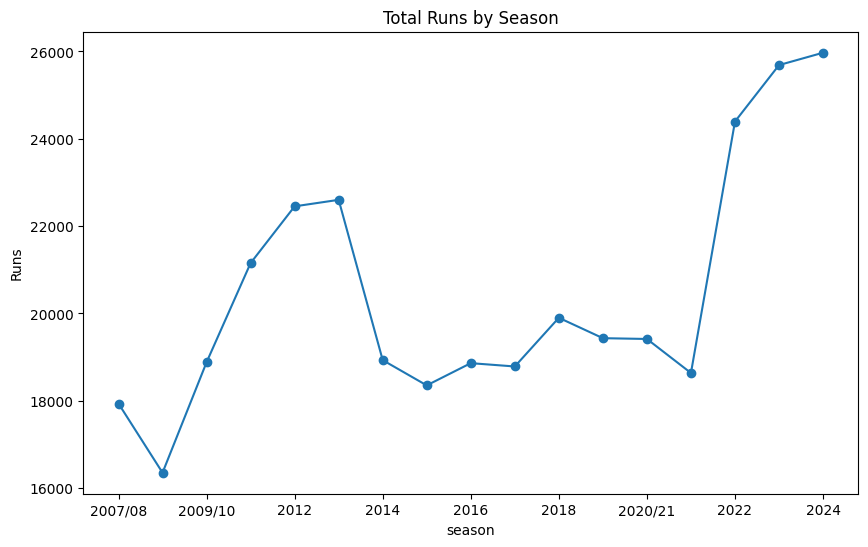

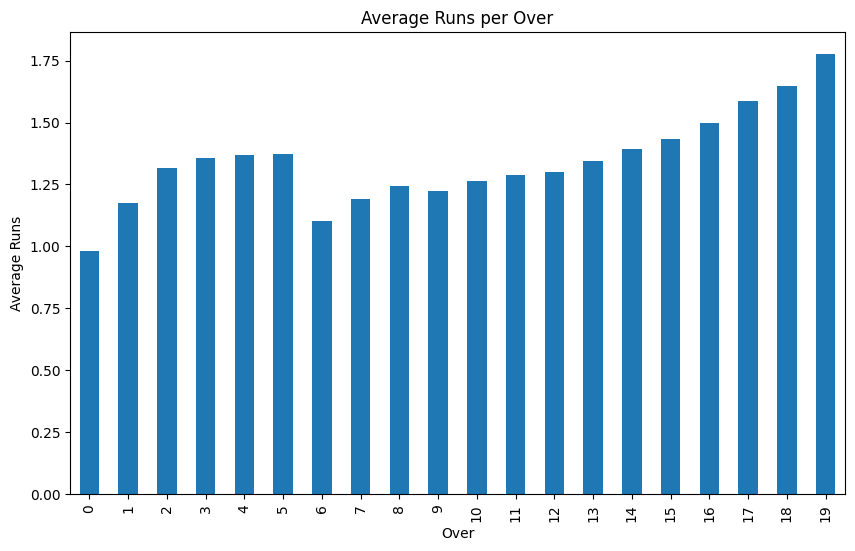

In [27]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,6)

DELIVERIES_PATH = "/content/deliveries.csv.zip"
MATCHES_PATH = "/content/matches (1).csv"

deliveries = pd.read_csv(DELIVERIES_PATH)
matches = pd.read_csv(MATCHES_PATH)

print(f"Deliveries shape: {deliveries.shape}")
print(f"Matches shape: {matches.shape}")

if 'season' not in matches.columns and 'date' in matches.columns:
    matches['season'] = pd.to_datetime(matches['date']).dt.year
deliveries = deliveries.merge(
    matches[['id','season','winner','toss_winner','toss_decision','venue']],
    left_on='match_id',
    right_on='id',
    how='left'
)
print('Merged deliveries shape:', deliveries.shape)

top_runs = deliveries.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(10)
ax = top_runs.plot(kind='barh', title='Top 10 Batsman by Runs')
ax.invert_yaxis()
ax.set_xlabel('Runs')
plt.show()

deliveries['is_wicket'] - deliveries['player_dismissed'].notna().astype(int)
top_wkts = deliveries.groupby('bowler')['is_wicket'].sum().sort_values(ascending=False).head(10)
ax = top_wkts.plot(kind='barh', title='Top 10 Bowlers by Wickets', color='tab:orange')
ax.invert_yaxis()
ax.set_xlabel('Wickets')
plt.show()

total_matches = matches['team1'].value_counts() + matches['team2'].value_counts()
wins = matches['winner'].value_counts()
win_pct = (wins / total_matches).sort_values(ascending=False)
ax = win_pct.plot(kind='barh', title='Team Win Percentage')
ax.set_ylabel('Win %')
plt.xticks(rotation=45, ha='right')
plt.show()

runs_by_season = deliveries.groupby('season')['total_runs'].sum().sort_index()
ax = runs_by_season.plot(marker='o')
ax.set_title('Total Runs by Season')
ax.set_ylabel('Runs')
plt.show()

runs_per_over = deliveries.groupby('over')['total_runs'].mean()
ax = runs_per_over.plot(kind='bar', title='Average Runs per Over')
ax.set_xlabel('Over')
ax.set_ylabel('Average Runs')
plt.show()